# Matrix rotation

In [1]:
from numba import jit, guvectorize

In [2]:
import numpy

In [3]:
@jit
def rot_mat(theta):
    return numpy.array(([numpy.cos(theta), -1 * numpy.sin(theta)], 
                      [numpy.sin(theta), numpy.cos(theta)]))

In [4]:
rot_mat(.2)

array([[ 0.98006658, -0.19866933],
       [ 0.19866933,  0.98006658]])

In [5]:
@guvectorize(["void(float64[:,:], float64[:,:], float64[:,:])"],
            "(m,m),(m,n)->(m,n)")
def rotate(a, b, c):
    c[:] = a @ b

In [19]:
a = rot_mat(90*numpy.pi/180)
b = numpy.arange(1, 20000, dtype=numpy.float64)
b = numpy.array((b, b))
c = numpy.empty_like(b)

In [20]:
rotate(a, b, c)

array([[ -1.00000000e+00,  -2.00000000e+00,  -3.00000000e+00, ...,
         -1.99970000e+04,  -1.99980000e+04,  -1.99990000e+04],
       [  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
          1.99970000e+04,   1.99980000e+04,   1.99990000e+04]])

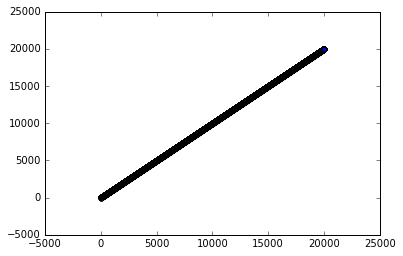

In [21]:
from matplotlib import pyplot
%matplotlib inline
pyplot.scatter(b[0,:], b[1,:])

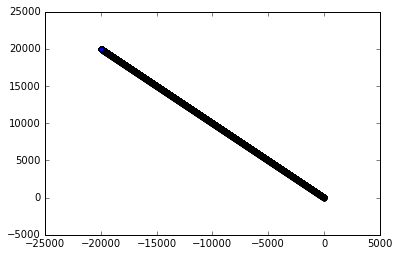

In [22]:
pyplot.scatter(c[0, :], c[1, :])

In [23]:
%%timeit
a @ b

The slowest run took 7.51 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 30.6 µs per loop


In [24]:
%%timeit
rotate(a, b, c)

The slowest run took 5.04 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 72 µs per loop


In [25]:
from numba import jit

In [26]:
@jit
def rotate(a, b):
    return a @ b

In [28]:
%%timeit
rotate(a, b)

The slowest run took 38.74 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.39 µs per loop
